In [1]:
# all the f'ing imports
import scipy.io as sio
import os,sys
sys.path.append('/home/mayank/work/pyutils')
import myutils
import re
from stephenHeadConfig import conf as conf
import shutil

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import cv2
import math
import lmdb
import caffe
from random import randint,sample
import pickle
import h5py


import mpld3
mpld3.enable_notebook()

import multiResData
reload(multiResData)

multiResData.createDB(conf)

Creating val data /groups/branson/bransonlab/mayank/PoseTF/cacheHead/valdata!
Done 0 of 127 movies, count:0 val:3
Done 1 of 127 movies, count:3 val:3
Done 2 of 127 movies, count:5 val:3
Done 3 of 127 movies, count:6 val:3
Done 4 of 127 movies, count:6 val:3
Done 5 of 127 movies, count:8 val:3
Done 6 of 127 movies, count:8 val:6
Done 7 of 127 movies, count:8 val:9
Done 8 of 127 movies, count:8 val:9
Done 9 of 127 movies, count:8 val:9
Done 10 of 127 movies, count:11 val:9
Done 11 of 127 movies, count:14 val:9
Done 12 of 127 movies, count:17 val:9
Done 13 of 127 movies, count:17 val:9
Done 14 of 127 movies, count:17 val:9
Done 15 of 127 movies, count:20 val:9
Done 16 of 127 movies, count:22 val:9
Done 17 of 127 movies, count:22 val:12
Done 18 of 127 movies, count:22 val:12
Done 19 of 127 movies, count:22 val:12
Done 20 of 127 movies, count:25 val:12
Done 21 of 127 movies, count:28 val:12
Done 22 of 127 movies, count:30 val:12
Done 23 of 127 movies, count:32 val:12
Done 24 of 127 movies, 

In [6]:
# all the f'ing imports
import scipy.io as sio
import os,sys
sys.path.append('/home/mayank/work/pyutils')
import myutils
import re
import shutil

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import cv2
import math
import lmdb
import caffe
from random import randint,sample
import pickle
import h5py
from stephenHeadConfig import sideconf as conf


import mpld3
mpld3.enable_notebook()

import multiResData
reload(multiResData)

multiResData.createDB(conf)

Done 0 of 127 movies, count:3 val:0
Done 1 of 127 movies, count:3 val:3
Done 2 of 127 movies, count:3 val:5
Done 3 of 127 movies, count:4 val:5
Done 4 of 127 movies, count:4 val:5
Done 5 of 127 movies, count:6 val:5
Done 6 of 127 movies, count:9 val:5
Done 7 of 127 movies, count:12 val:5
Done 8 of 127 movies, count:12 val:5
Done 9 of 127 movies, count:12 val:5
Done 10 of 127 movies, count:15 val:5
Done 11 of 127 movies, count:18 val:5
Done 12 of 127 movies, count:18 val:8
Done 13 of 127 movies, count:18 val:8
Done 14 of 127 movies, count:18 val:8
Done 15 of 127 movies, count:21 val:8
Done 16 of 127 movies, count:21 val:10
Done 17 of 127 movies, count:24 val:10
Done 18 of 127 movies, count:24 val:10
Done 19 of 127 movies, count:24 val:10
Done 20 of 127 movies, count:24 val:13
Done 21 of 127 movies, count:24 val:16
Done 22 of 127 movies, count:26 val:16
Done 23 of 127 movies, count:28 val:16
Done 24 of 127 movies, count:28 val:16
Done 25 of 127 movies, count:31 val:16
Done 26 of 127 movi

/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


In [1]:
# convert from dropbox to the newer location
import pickle
with open('cacheHead/valdata_dropbox','rb') as f:
    isval,localdirs,seldirs = pickle.load(f)
localdirs[0][35:]
ll = ['/home/mayank/work/PoseEstimationData' + x[35:] for x in localdirs]
ll[0]
with open('cacheHead/valdata','wb') as f:
    pickle.dump([isval,ll,seldirs],f)

In [18]:
_,valmovies = multiResData.getMovieLists(conf)
print valmovies[0]
print valmovies[3]

/home/mayank/work/PoseEstimationData/Stephen/7_7_13_47D05AD_81B12DBD_x_Chrimsonattp18/data/fly_0019/fly_0019_trial_002/C001H001S0001/C001H001S0001.avi
/home/mayank/work/PoseEstimationData/Stephen/7_7_13_47D05AD_81B12DBD_x_Chrimsonattp18/data/fly_0023/fly_0023_trial_002/C001H001S0001/C001H001S0001.avi


In [2]:
# copy the validation file from front view to side view
import pickle
import os
import re

from stephenHeadConfig import conf
conforig = conf
from stephenHeadConfig import sideconf as conf
outfile = os.path.join(conforig.cachedir,conforig.valdatafilename)
assert os.path.isfile(outfile),"valdatafile doesn't exist"

with open(outfile,'r') as f:
    isval,localdirs,seldirs = pickle.load(f)

newdirs = []    
for ndx,l in enumerate(localdirs):
    if ndx == 19:
        newdirs.append('/home/mayank/work/PoseEstimationData/Stephen/7_7_13_47D05AD_81B12DBD_x_Chrimsonattp18/data/fly_0023/fly_0023_trial_005/C001H001S0002/C001H001S0002.avi')
    else:
        newdirs.append(re.sub('C002','C001',l,count = 3))
#     print('%d %d:%s' % (ndx,os.path.isfile(newdirs[-1]),newdirs[-1]))

outfile = os.path.join(conf.cachedir,conf.valdatafilename)

with open(outfile,'w') as f:
    pickle.dump([isval,newdirs,seldirs],f)
    

In [ ]:
import PoseTrain
reload(PoseTrain)
from stephenHeadConfig import conf

pobj = PoseTrain.PoseTrain(conf)
pobj.baseTrain(restore=True)

Initial lower res layer size None, 128, 128, 128
Initial higher res layer size None, 128, 128, 128
Crop start lower res layer at 0, 0, 0, 0
Final size of lower res layer None, 128, 128, 128


In [1]:
import PoseTrain
reload(PoseTrain)
from stephenHeadConfig import conf as conf

pobj = PoseTrain.PoseTrain(conf)
pobj.baseTrain(restore=True)

Initial lower res layer size None, 128, 128, 128
Initial higher res layer size None, 128, 128, 128
Crop start lower res layer at 0, 0, 0, 0
Final size of lower res layer None, 128, 128, 128
Not loading base variables. Initializing them
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Iter 0, Train = 55324.844,132.8, Val = 55240.103,136.1
Saved state to /groups/branson/bransonlab/mayank/PoseTF/cacheHead/headBase-0
Iter 30, Train = 721.050,190.4, Val = 736.712,200.6
Iter 60, Train = 95.215,231.8, Val = 93.079,204.0
Iter 90, Train = 72.528,227.9, Val = 74.024,225.1
Iter 120, Train = 71.346,194.6, Val = 71.508,192.0
Iter 150, Train = 70.637,112.2, Val = 71.889,142.8
Iter 180, Train = 69.938,130.3, Val = 71.052,121.8
Iter 210, Train = 69.681,119.0, Val = 71.068,135.4
Iter 240, Train = 69.503,97.6, Val = 72.015,113.7
Iter 270, Train = 69.630,123.2, Val = 70.102,115.9
Iter 300, Train = 70.816,93.6, Val = 71.385,79.1
Iter 330, Train = 69.427,65.2, Val = 70.949,59.1
Iter 

In [1]:
import PoseTrain
reload(PoseTrain)
from stephenHeadConfig import sideconf as conf
import tensorflow as tf
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '0'
pobj = PoseTrain.PoseTrain(conf)
pobj.baseTrain(restore=True)

Initial lower res layer size None, 128, 128, 128
Initial higher res layer size None, 128, 128, 128
Crop start lower res layer at 0, 0, 0, 0
Final size of lower res layer None, 128, 128, 128
Parameters that dont match for base:
device doesnt match
Loading base variables from /groups/branson/bransonlab/mayank/PoseTF/cacheHeadSide/headBase-2500
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Iter 2520, Train = 21.606,4.7, Val = 28.193,6.1
Iter 2550, Train = 21.357,4.9, Val = 26.710,5.8
Iter 2580, Train = 17.593,3.8, Val = 25.192,5.5
Iter 2610, Train = 18.175,4.7, Val = 27.484,6.1
Iter 2640, Train = 19.339,4.6, Val = 27.107,5.8
Iter 2670, Train = 19.823,5.0, Val = 29.158,5.8
Iter 2700, Train = 21.252,4.7, Val = 27.147,6.3
Iter 2730, Train = 18.969,4.6, Val = 28.572,6.1
Iter 2760, Train = 18.361,4.9, Val = 26.726,6.0
Iter 2790, Train = 19.813,5.0, Val = 29.178,6.1
Iter 2820, Train = 19.516,4.6, Val = 27.719,6.0
Iter 2850, Train = 20.122,4.6, Val = 27.719,5.8
Iter 288

In [1]:
import PoseTrain
reload(PoseTrain)
from stephenHeadConfig import sideconf as conf
import tensorflow as tf
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '0'
pobj = PoseTrain.PoseTrain(conf)
pobj.mrfTrain(restore=False)

Loading base from /groups/branson/bransonlab/mayank/PoseTF/cacheHeadSide/headBase-5000
Not loading mrf variables. Initializing them
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Iter 0, Train = 42.906,8.9, Val = 46.118,9.6 (32.6,29.9),(5.7,5.9)
Saved state to /groups/branson/bransonlab/mayank/PoseTF/cacheHeadSide/headMRF-0
Iter 30, Train = 43.323,8.6, Val = 45.048,9.7 (23.7,28.1),(5.3,5.9)
Iter 60, Train = 43.223,8.5, Val = 43.369,9.1 (24.3,29.0),(5.2,5.9)
Iter 90, Train = 38.100,8.5, Val = 42.840,9.3 (22.8,28.0),(5.3,6.0)
Iter 120, Train = 37.921,8.2, Val = 41.711,8.7 (26.3,29.0),(5.6,5.9)
Iter 150, Train = 37.630,7.9, Val = 41.382,9.0 (22.4,28.3),(5.0,6.0)
Iter 180, Train = 38.348,7.5, Val = 40.345,8.6 (22.1,28.3),(4.7,5.8)
Iter 210, Train = 38.972,7.7, Val = 40.369,9.0 (28.7,28.9),(5.9,6.1)
Iter 240, Train = 36.874,7.5, Val = 39.257,8.4 (30.1,28.2),(5.7,5.8)
Iter 270, Train = 37.021,7.7, Val = 39.591,8.8 (25.4,28.9),(6.2,6.1)
Iter 300, Train = 35.784,8.7, V

In [1]:
import PoseTrain
reload(PoseTrain)
from stephenHeadConfig import sideconf as conf
import tensorflow as tf

pobj = PoseTrain.PoseTrain(conf)
pobj.mrfTrain(restore=False)

Initial lower res layer size None, 128, 128, 128
Initial higher res layer size None, 128, 128, 128
Crop start lower res layer at 0, 0, 0, 0
Final size of lower res layer None, 128, 128, 128
Loading base from /home/mayank/work/tensorflow/cacheHeadSide/headBase-5000
Not loading mrf variables. Initializing them
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Iter 0, Train = 44.034,9.0, Val = 46.599,9.9 (29.1,31.2),(5.5,6.4)
Saved state to /home/mayank/work/tensorflow/cacheHeadSide/headMRF-0
Iter 30, Train = 42.716,9.0, Val = 45.233,9.8 (26.3,32.9),(5.7,6.6)
Iter 60, Train = 42.679,8.8, Val = 43.306,9.4 (27.7,31.9),(5.7,6.4)
Iter 90, Train = 37.974,7.8, Val = 43.164,9.5 (26.9,32.6),(5.8,6.5)
Iter 120, Train = 37.672,8.4, Val = 41.580,9.1 (27.5,31.8),(5.2,6.4)
Iter 150, Train = 37.503,7.5, Val = 41.710,9.3 (24.0,32.6),(4.8,6.6)
Iter 180, Train = 37.309,7.4, Val = 40.235,9.0 (23.5,31.2),(4.9,6.3)
Iter 210, Train = 39.818,8.2, Val = 40.695,9.1 (35.7,33.2),(6.8,6.7)
Ite

/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


In [1]:
import PoseTrain
reload(PoseTrain)
from stephenHeadConfig import sideconf as conf
import tensorflow as tf

pobj = PoseTrain.PoseTrain(conf)
pobj.acTrain(restore=True)

Initial lower res layer size None, 128, 128, 128
Initial higher res layer size None, 128, 128, 128
Crop start lower res layer at 0, 0, 0, 0
Final size of lower res layer None, 128, 128, 128
Loading base from /home/mayank/work/tensorflow/cacheHeadSide/headBase-5000
Parameters that dont match for AC:
Loading AC variables from /home/mayank/work/tensorflow/cacheHeadSide/headAC-3000
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Initializing variable:AC_/AC_/weights/Adam:0
Initializing variable:AC_/AC_/weights/Adam_1:0
Initializing variable:AC_/AC_/biases/Adam:0
Initializing variable:AC_/AC_/biases/Adam_1:0
Iter 3030, Train = 27.047,5.3, Val = 32.818,6.6 (24.6,31.6),(5.1,6.4)
Iter 3060, Train = 29.702,5.7, Val = 33.164,6.9 (29.5,32.7),(5.8,6.6)
Iter 3090, Train = 28.875,5.6, Val = 31.869,6.6 (28.8,31.8),(5.3,6.3)
Iter 3120, Train = 24.338,5.1, Val = 32.851,6.9 (22.3,32.5),(4.5,6.6)
Iter 3150, Train = 28.659,5.9, Val = 31.936,6.6 (26.6,31.7),(5.4,6.3)
Iter 3180, Trai

/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


In [2]:
import PoseTrain
reload(PoseTrain)
import tensorflow as tf
from stephenHeadConfig import sideconf as conf
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '0'
conf.useAC = False
conf.useMRf = False
pobj = PoseTrain.PoseTrain(conf)

pobj.fineTrain(restore=False)

Parameters that dont match for base:
useAC doesnt match
useMRf doesnt match
Loading base variables from /groups/branson/bransonlab/mayank/PoseTF/cacheHeadSide/headBase-5000
Parameters that dont match for mrf:
useAC doesnt match
useMRf doesnt match
Loading mrf variables from /groups/branson/bransonlab/mayank/PoseTF/cacheHeadSide/headMRF-3000
Not loading AC variables. Initializing them
Not loading fine variables. Initializing them
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Iter 0, Train = 10934.632,26.4, Val = 10893.332,26.6 (MRF:9.5,10.7,5.2,6.0) (Base:14.0,27.0,4.0,5.7)
Saved state to /groups/branson/bransonlab/mayank/PoseTF/cacheHeadSide/headFine-0
Iter 30, Train = 405.695,23.0, Val = 402.236,24.0 (MRF:9.6,10.5,4.9,5.8) (Base:13.4,25.5,4.1,5.3)
Iter 60, Train = 99.265,13.5, Val = 100.760,14.4 (MRF:9.5,10.2,5.3,5.6) (Base:15.9,23.6,4.3,5.2)
Iter 90, Train = 76.841,6.2, Val = 81.484,9.3 (MRF:9.5,10.5,5.2,6.0) (Base:15.3,26.3,4.2,5.6)
Iter 120, Train = 72.657

In [ ]:
ll = np.max(berr,1)

zz = np.argwhere(ll>15)
from matplotlib import cm
fig = plt.figure(figsize=(8,5))
for idx in range(zz.shape[0]):
    img = zz[idx,0]

    fig.clf()
    ax12 = fig.add_subplot(1,1,1)
    ax12.imshow(all_images[img][0,:,:,0],cmap=cm.gray)

    all_locs = np.zeros([5,3,2])
    for ondx in range(conf.n_classes):
        maxndx = np.argmax(basepred[img][0,:,:,ondx])
        predloc = np.array(np.unravel_index(maxndx,basepred[img].shape[1:3]))
        predloc = predloc * conf.pool_scale 
        all_locs[ondx,0,:] = predloc
        maxndx = np.argmax(mrfpred[img][0,:,:,ondx])
        mrfloc = np.array(np.unravel_index(maxndx,mrfpred[img].shape[1:3]))
        mrfloc = mrfloc * conf.pool_scale 
        all_locs[ondx,1,:] = predloc
        maxndx = np.argmax(finepred[img][0,:,:,ondx])
        finepredloc = (np.array(np.unravel_index(maxndx,finepred[img].shape[1:3]))-conf.fine_sz/2)
        all_locs[ondx,2,:]= predloc+finepredloc


    plt.scatter(labels[img][0,:,0]/conf.rescale,labels[img][0,:,1]/conf.rescale,
                c=np.linspace(0,1,conf.n_classes),hold=True,cmap=cm.jet,
                linewidths=0,edgecolors='face',s=5)
    plt.scatter(all_locs[:,0,1],all_locs[:,0,0],
                c=np.linspace(0,1,conf.n_classes),hold=True,cmap=cm.jet,alpha=0.2,
                linewidths=0,edgecolors='face',s=5)
    plt.scatter(all_locs[:,2,1],all_locs[:,2,0],
                c=np.linspace(0,1,conf.n_classes),hold=True,cmap=cm.jet,alpha=0.6,
                linewidths=0,edgecolors='face',s=5)
    outname = 'results/headBaseAndFine%d.png'%idx
#     plt.savefig(outname,dpi=500)
#     raw_input('Press Enter')


In [1]:
# create a list of movies for stephen -- May 23 2016
import os
with open("/groups/branson/bransonlab/mayank/PoseEstimationData/Stephen/folders2track.txt", "r") as text_file:
    movies = text_file.readlines()
movies = [x.rstrip() for x in movies]

import glob
sdir = movies[0::2]    
fdir = movies[1::2]
fmovies = []
smovies = []
for ndx,ff  in enumerate(sdir):
    kk = glob.glob(ff+'/*_c.avi')
    if len(kk) is not 1:
        print ff
        continue
    smovies.append(kk[0])
    kk = glob.glob(fdir[ndx]+'/*_c.avi')
    fmovies += kk
        
print smovies[0:3]
print fmovies[0:3]
print len(smovies)
print len(fmovies)
for ff in smovies+fmovies:
    if not os.path.isfile(ff):
        print ff

['/groups/branson/bransonlab/projects/flyHeadTracking/fly219/fly219_trial1/C001H001S0001/C001H001S0001_c.avi', '/groups/branson/bransonlab/projects/flyHeadTracking/fly219/fly219_trial2/C001H001S0001/C001H001S0001_c.avi', '/groups/branson/bransonlab/projects/flyHeadTracking/fly219/fly219_trial3/C001H001S0001/C001H001S0001_c.avi']
['/groups/branson/bransonlab/projects/flyHeadTracking/fly219/fly219_trial1/C002H001S0001/C002H001S0001_c.avi', '/groups/branson/bransonlab/projects/flyHeadTracking/fly219/fly219_trial2/C002H001S0001/C002H001S0001_c.avi', '/groups/branson/bransonlab/projects/flyHeadTracking/fly219/fly219_trial3/C002H001S0001/C002H001S0001_c.avi']
129
129


In [2]:
import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

# For SIDE
from stephenHeadConfig import sideconf as conf
conf.useMRF = False
outtype = 1
extrastr = '_side'
redo = False

# For FRONT
# from stephenHeadConfig import conf as conf
# conf.useMRF = True
# outtype = 2
# extrastr = ''

# conf.batch_size = 1

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()
PoseTools.initNetwork(self,sess,outtype)

from scipy import io
import cv2

# _,valmovies = multiResData.getMovieLists(conf)
# for ndx in range(len(valmovies)):
#     valmovies[ndx] = '/groups/branson/bransonlab/mayank/' + valmovies[ndx][17:]
# for ndx in [0,3,-3,-1]:

# valmovies = ['/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly138/fly138_trial1/C001H001S0001/C001H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly138/fly138_trial2/C001H001S0001/C001H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly138/fly138_trial3/C001H001S0001/C001H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly138/fly138_trial4/C001H001S0001/C001H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly163/fly163_trial1/C001H001S0001/C001H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly163/fly163_trial2/C001H001S0001/C001H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly163/fly163_trial3/C001H001S0001/C001H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly163/fly163_trial4/C001H001S0001/C001H001S0001_c.avi',
#             ]
# for ndx in range(len(valmovies)):
valmovies = smovies    
for ndx in range(len(valmovies)):
    mname,_ = os.path.splitext(os.path.basename(valmovies[ndx]))
    oname = re.sub('!','__',conf.getexpname(valmovies[ndx]))
#     pname = '/groups/branson/home/kabram/bransonlab/PoseTF/results/headResults/movies/' + oname + extrastr
    pname = '/nobackup/branson/mayank/stephenOut/' + oname + extrastr
    if os.path.isfile(pname + '.mat') and not redo:
        continue
        

    if not os.path.isfile(valmovies[ndx]):
        continue
    
    predList = PoseTools.classifyMovie(conf,valmovies[ndx],outtype,self,sess)
#     PoseTools.createPredMovie(conf,predList,valmovies[ndx],pname + '.avi',outtype)


    cap = cv2.VideoCapture(valmovies[ndx])
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    orig_crop_loc = conf.cropLoc[(height,width)]
    crop_loc = [x/4 for x in orig_crop_loc] 
    end_pad = [height/4-crop_loc[0]-conf.imsz[0]/4,width/4-crop_loc[1]-conf.imsz[1]/4]
    pp = [(0,0),(crop_loc[0],end_pad[0]),(crop_loc[1],end_pad[1]),(0,0),(0,0)]
    predScores = np.pad(predList[1],pp,mode='constant',constant_values=-1.)

    predLocs = predList[0]
    predLocs[:,:,:,0] += orig_crop_loc[1]
    predLocs[:,:,:,1] += orig_crop_loc[0]
    
    io.savemat(pname + '.mat',{'locs':predLocs,'scores':predScores[...,0],'expname':valmovies[ndx]})
    print 'Done:%s'%oname



print pp
print predList[1].shape

Parameters that dont match for base:
Loading base variables from /groups/branson/bransonlab/mayank/PoseTF/cacheHeadSide/headBase-5000
....................
....................
....................
....................
...........Done:projects__fly235_300ms_stimuli__0010
....................
....................
....................
....................
...........Done:projects__fly241_300ms_stimuli__0010
....................
....................
....................
....................
...........Done:projects__fly234_300ms_stim__0010
....................
....................
....................
....................
...........Done:projects__fly244_300ms_stimuli__0010
....................
....................
....................
....................
...........Done:projects__fly251_300ms_stimuli__0010
....................
....................
....................
....................
...........Done:projects__fly253_300ms_stimuli__0010
[(0, 0), (0, 0), (0, 64), (0, 0), (0, 0)]
(1455

In [1]:
import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io
from matplotlib import cm
from stephenHeadConfig import sideconf as conf
odir = 'results/headResults/MRF_side/'


# conf = sideconf
conf.batch_size = 1
conf.useMRF = True
outtype = 2

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()
PoseTools.initNetwork(self,sess,outtype)

self.openDBs()
self.createCursors()
numex = self.valenv.stat()['entries']
all_preds = np.zeros([numex,]+self.basePred.get_shape().as_list()[1:]+[2,])
ims = np.zeros((numex,)+conf.imsz)
predLocs = np.zeros([numex,conf.n_classes,2,3])

self.val_cursor.first()
for count in range(numex):
    self.updateFeedDict(self.DBType.Val)
    curpred = sess.run([self.basePred,self.mrfPred],feed_dict = self.feed_dict)
    all_preds[count,:,:,:,0] = curpred[0]
    all_preds[count,:,:,:,1] = curpred[1]
    predLocs[count,:,:,0] = PoseTools.getBasePredLocs(curpred[0],conf)[0,:,:]
    predLocs[count,:,:,1] = PoseTools.getBasePredLocs(curpred[1],conf)[0,:,:]
    predLocs[count,:,:,2] = self.locs[0,:,:]
    ims[count,:,:] = self.xs[0,0,:,:]

Initial lower res layer size None, 128, 128, 128
Initial higher res layer size None, 128, 128, 128
Crop start lower res layer at 0, 0, 0, 0
Final size of lower res layer None, 128, 128, 128
Parameters that dont match for base:
batch_size doesnt match
cachedir doesnt match
cropLoc doesnt match
view doesnt match
Loading base variables from /home/mayank/work/tensorflow/cacheHeadSide/headBase-5000
Parameters that dont match for mrf:
batch_size doesnt match
Loading mrf variables from /home/mayank/work/tensorflow/cacheHeadSide/headMRF-3000


/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


[  2874.   5153.  10649.]
[ 30.  31.  32.]


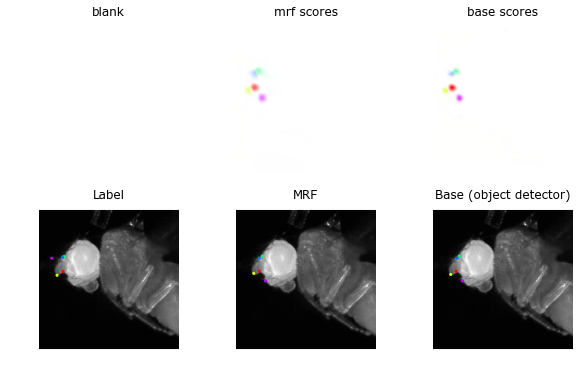

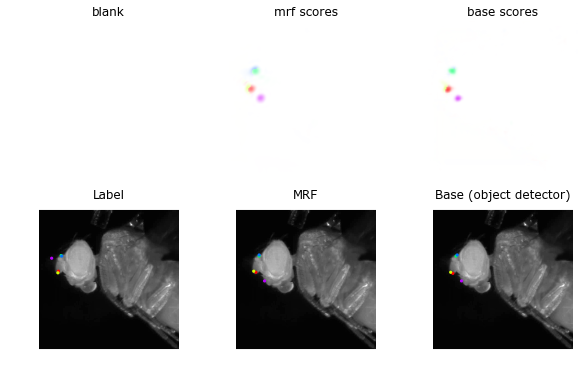

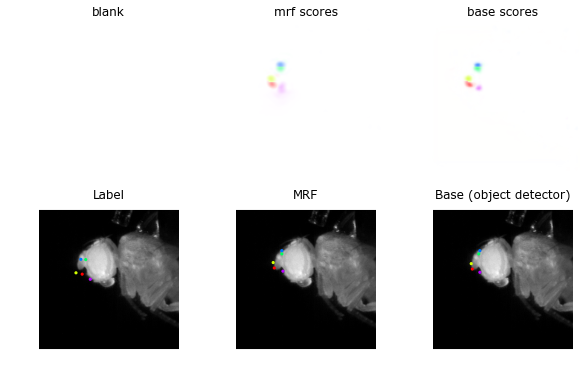

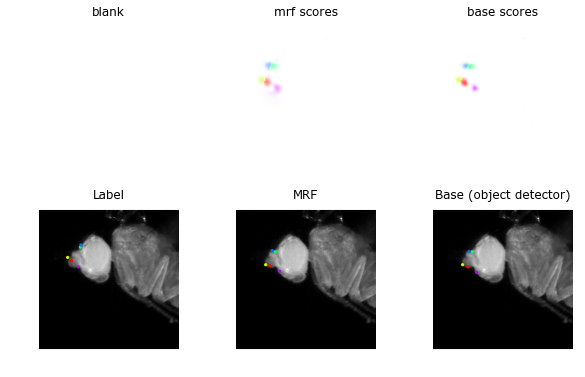

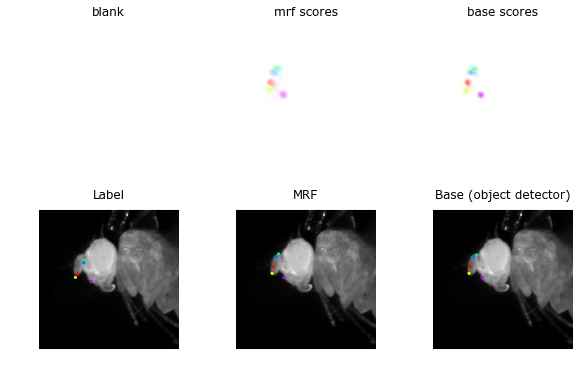

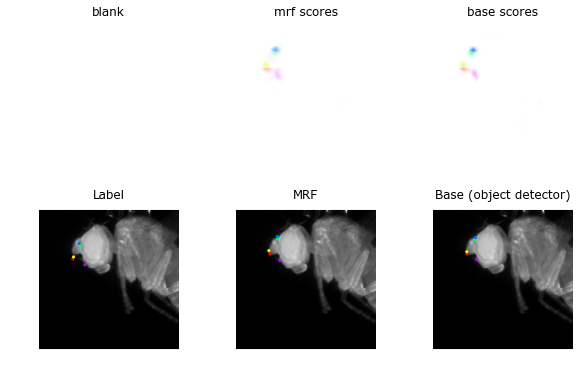

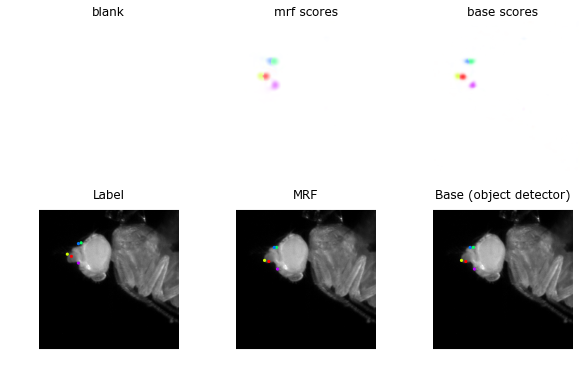

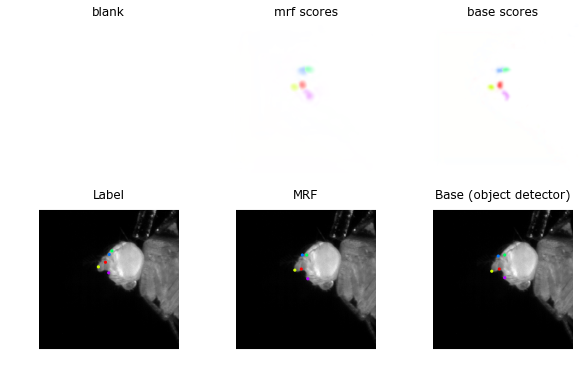

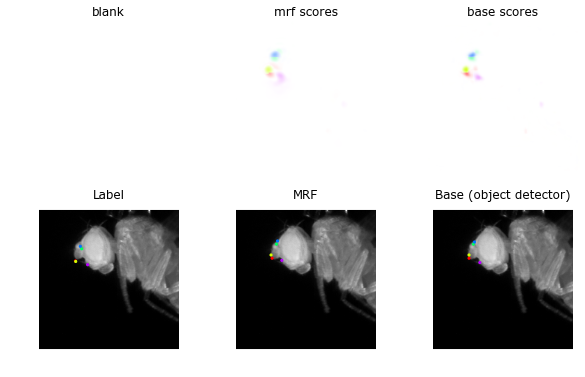

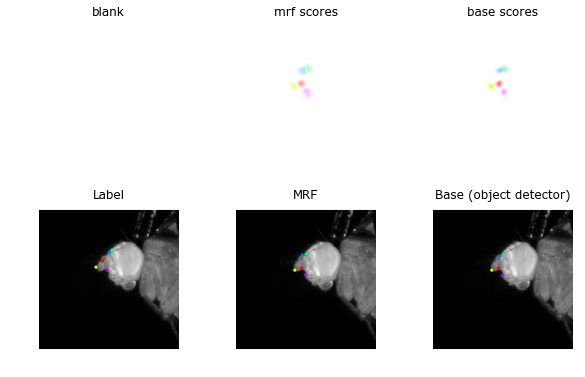

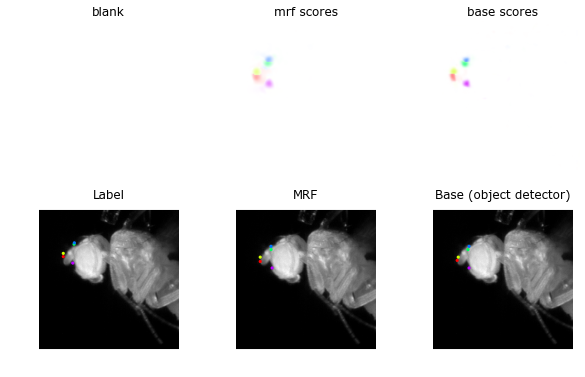

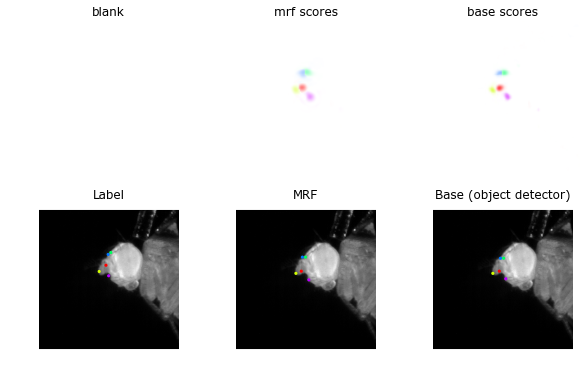

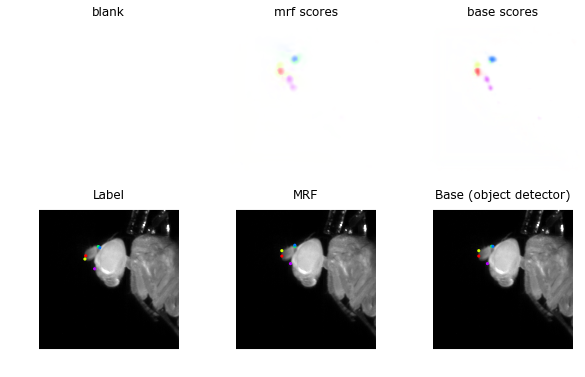

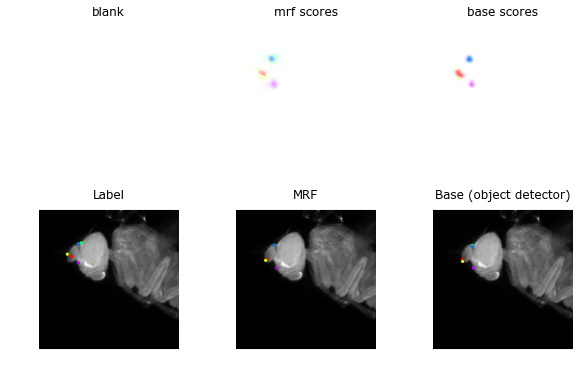

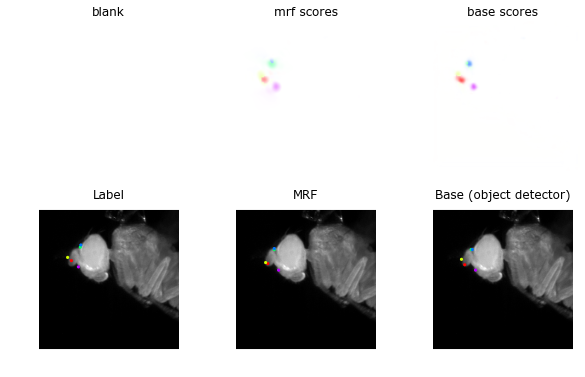

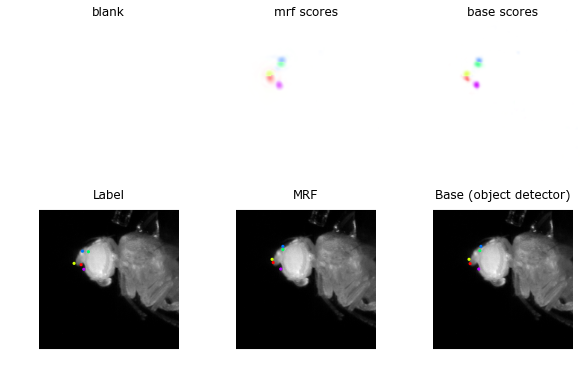

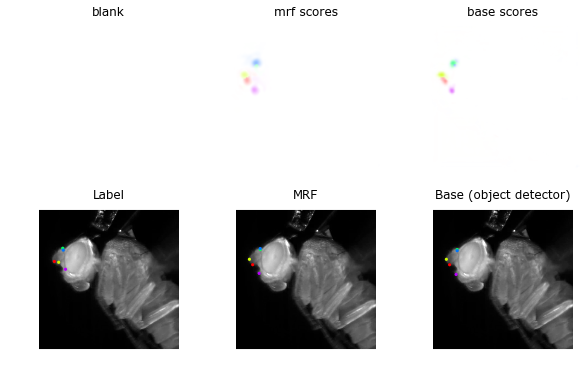

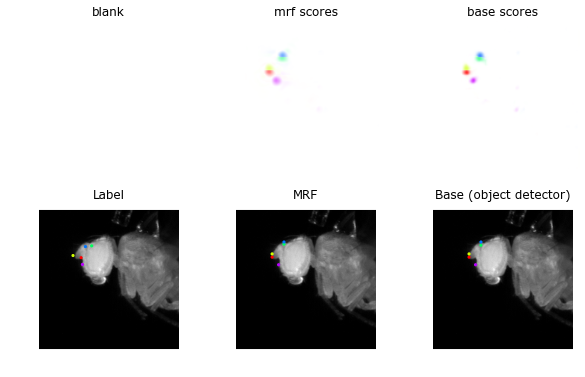

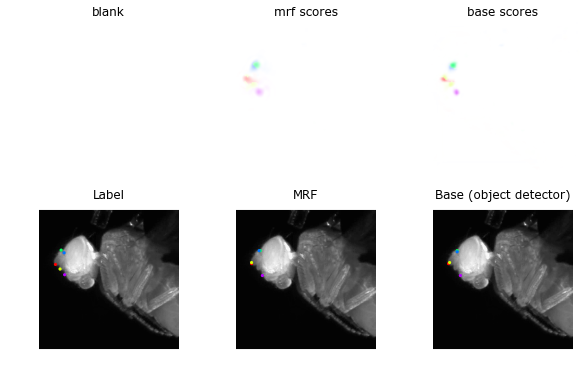

In [3]:
diff = (predLocs[:,:,:,1]-predLocs[:,:,:,2])**2
bname = odir + 'MRF_impact_dmaxMRFLabel_%d.png'
dd = np.squeeze(np.apply_over_axes(np.sum,diff,[1,2]))
oo = dd.argsort()
# diffb = (predLocs[:,:,:,0]-predLocs[:,:,:,2])**2
# diffm = (predLocs[:,:,:,1]-predLocs[:,:,:,2])**2
# ddb = np.squeeze(np.apply_over_axes(np.sum,diffb,[1,2])) 
# ddm = np.squeeze(np.apply_over_axes(np.sum,diffm,[1,2])) 
# # oo = (ddb-ddm).argsort()
# # bname = odir + 'MRF_impact_maxImprovement_%d.png'
# oo = (ddm-ddb).argsort()
# bname = odir + 'MRF_impact_minImprovement_%d.png'
print dd[oo[-4:-1]]
print dd[oo[:3]]
nc = 2
nr = 3
for ndx in range(1,20):
    curi = oo[-ndx]
    aa1 = PoseTools.createPredImage(all_preds[curi,:,:,:,0],conf.n_classes)
    aa2 = PoseTools.createPredImage(2*all_preds[curi,:,:,:,1]-1,conf.n_classes)
    fig = plt.figure(figsize=(10,6))
    ax2 = fig.add_subplot(nc,nr,1)
    ax2.set_title('blank')
    ax2.axis('off')
    ax1 = fig.add_subplot(nc,nr,3)
    ax1.imshow(aa1)
    ax1.axis('off')
    ax1.set_title('base scores')
    ax2 = fig.add_subplot(nc,nr,2)
    ax2.imshow(aa2)
    ax2.axis('off')
    ax2.set_title('mrf scores')
    ax3 = fig.add_subplot(nc,nr,4)
    ax3.imshow(ims[curi,:,:],cmap=cm.gray)
    ax3.scatter(predLocs[curi,:,0,2],predLocs[curi,:,1,2], #hold=True,
                c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
                s=10, linewidths=0, edgecolors='face')
    ax3.axis('off')
    ax3.set_title('Label')
    ax3 = fig.add_subplot(nc,nr,5)
    ax3.imshow(ims[curi,:,:],cmap=cm.gray)
    ax3.scatter(predLocs[curi,:,0,1],predLocs[curi,:,1,1], #hold=True,
                c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
                s=10, linewidths=0, edgecolors='face')
    ax3.axis('off')
    ax3.set_title('MRF')
    ax3 = fig.add_subplot(nc,nr,6)
    ax3.imshow(ims[curi,:,:],cmap=cm.gray)
    ax3.scatter(predLocs[curi,:,0,0],predLocs[curi,:,1,0], #hold=True,
                c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
                s=10, linewidths=0, edgecolors='face')
    ax3.axis('off')
    ax3.set_title('Base (object detector)')
    plt.show()
    fig.savefig(bname%ndx)

In [1]:
# classifying a particular frame
import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io
from matplotlib import cm
from stephenHeadConfig import conf as conf
import myutils

conf.batch_size = 1
conf.useMRF = True
outtype = 2

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()
PoseTools.initNetwork(self,sess,outtype)


Parameters that dont match for base:
batch_size doesnt match
useMRF doesnt match
Loading base variables from /groups/branson/bransonlab/mayank/PoseTF/cacheHead/headBase-5000
Parameters that dont match for mrf:
batch_size doesnt match
useMRF doesnt match
Loading mrf variables from /groups/branson/bransonlab/mayank/PoseTF/cacheHead/headMRF-3000


200
[256, 256]
(56, 52)
0.0654484 -0.0139442
-0.758596 -1.02335


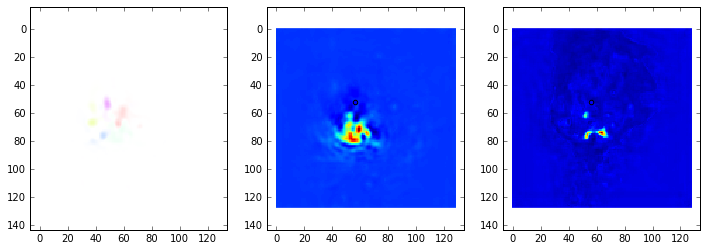

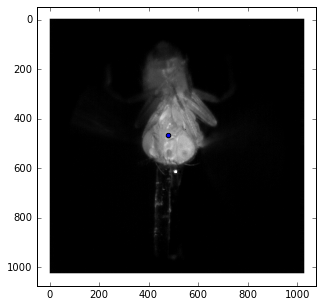

In [18]:
mov = '/groups/branson/home/kabram/bransonlab/PoseEstimationData/Stephen/7_7_13_47D05AD_81B12DBD_x_Chrimsonattp18/data/fly_0019/fly_0019_trial_002/C002H001S0001/C002H001S0001.avi'
fnum = 200

predPair = [self.mrfPred,self.basePred,self.baseLayers['conv7']]
cap,nframes = PoseTools.openMovie(mov)
im = myutils.readframe(cap,fnum)
im.shape
x0,x1,x2 = PoseTools.processImage(im,conf)
self.feed_dict[self.ph['x0']] = x0
self.feed_dict[self.ph['x1']] = x1
self.feed_dict[self.ph['x2']] = x2
pred = sess.run(predPair,self.feed_dict)
print fnum
locx = 480
locy = 465

cloc = conf.cropLoc[im.shape[0:2]]
print cloc
ftrloc = ((locx-cloc[0])/conf.pool_scale,(locy-cloc[1])/conf.pool_scale)
print ftrloc

predImg = PoseTools.createPredImage(pred[0][0,:,:,:]*2-1,conf.n_classes)
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(1,3,1)
sish(predImg,ax1)
ax2 = fig.add_subplot(1,3,2,sharex=ax1,sharey=ax1)
chn = 2
sish(pred[0][0,:,:,chn],ax2)
ax2.scatter(ftrloc[0],ftrloc[1])
ax2 = fig.add_subplot(1,3,3,sharex=ax1,sharey=ax1)
chn = 2
sish(pred[1][0,:,:,chn],ax2)
ax2.scatter(ftrloc[0],ftrloc[1])
print pred[0][0,:,:,chn].max(), pred[0][0,:,:,chn].min()
print pred[1][0,:,:,chn].max(), pred[1][0,:,:,chn].min()
plt.show()
fig = plt.figure(figsize = (5,5))
ish(im)
plt.scatter(locx,locy,hold=True)
selftr = pred[2][0,ftrloc[1],ftrloc[0],:]


In [19]:
from scipy.spatial import distance
import sys
self.openDBs()
self.createCursors()

numtr = self.env.stat()['entries']
tr_preds = np.zeros([numtr,]+self.basePred.get_shape().as_list()[1:]+[2,])
tr_maxsc = np.zeros([numtr,conf.n_classes])
tr_ims = np.zeros((numtr,)+conf.imsz)
tr_pred_locs = np.zeros([numtr,conf.n_classes,2,2])

self.train_cursor.first()
dmat = np.zeros((numtr,128,128))
for count in range(numtr):
    self.updateFeedDict(self.DBType.Train)
    curpred = sess.run([self.basePred,self.baseLayers['conv7']],feed_dict = self.feed_dict)
    tr_preds[count,:,:,:,0] = curpred[0]
    tr_maxsc[count,:] = curpred[0][0,:,:,:].max(axis=1).max(axis=0)
    curlocs = PoseTools.getBasePredLocs(curpred[0],conf)[0,:,:]
    tr_pred_locs[count,:,:,0] = curlocs
    tr_pred_locs[count,:,:,1] = self.locs[0,:,:]
    tr_ims[count,:,:] = self.xs[0,0,:,:]
    curftr = curpred[1][0,:,:,:]
    dmat[count,:,:] = np.sum(np.abs(selftr-curftr),2)
    if count%10==0:
        sys.stdout.write('.')
    if count%100==0:
        sys.stdout.write('\n')
                        

.
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
......

In [20]:
oo = np.argsort(dmat.flatten())
oo.shape
[oi,oy,ox] = np.unravel_index(oo,dmat.shape)
for ndx in range(5):
    print dmat[oi[ndx],oy[ndx],ox[ndx]]

8.30312728882
8.6743183136
8.84585285187
8.91237831116
9.23424720764


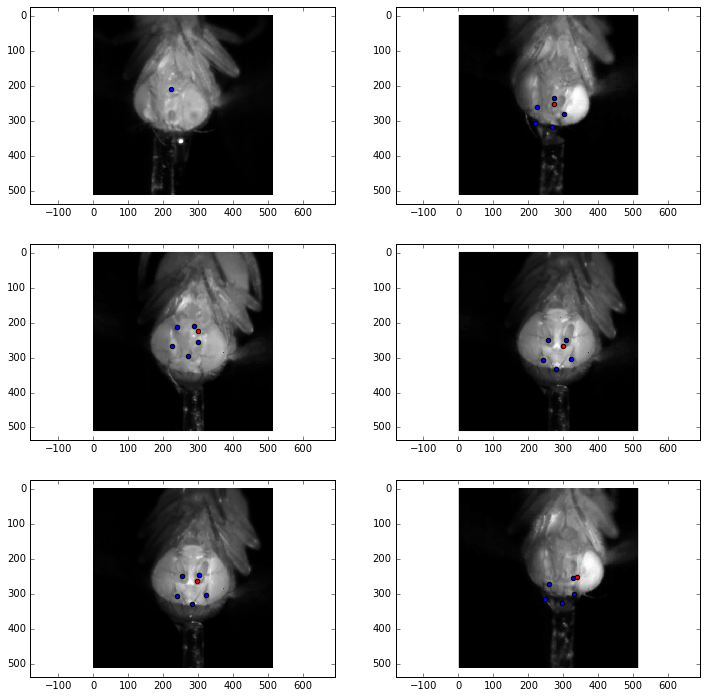

In [21]:
ncl = 5
fig = plt.figure(figsize = (12,12))
nc = 3
nr = 2
ax0 = fig.add_subplot(nc,nr,1)
sigray(im[256:-256,256:-256,:],ax0)
ax0.scatter(locx-256,locy-256)
for ndx in range(ncl):
    curi = oi[ndx]
    ax = fig.add_subplot(nc,nr,ndx+2,sharex=ax0,sharey=ax0)
    sigray(tr_ims[curi,:,:],ax)
    ax.scatter(tr_pred_locs[curi,:,0,1],tr_pred_locs[curi,:,1,1])
    ax.scatter(ox[ndx]*4,oy[ndx]*4,c='r')

In [5]:
# compare python gmm model to Kristin's matlab one
import h5py
import scipy.io
mfile = '/nobackup/branson/mayank/movies/projects__fly219_trial1.mat'
L = scipy.io.loadmat(mfile)
scores = L['scores']
print scores.shape

(1455, 128, 192, 5, 2)


In [6]:
ff = scores[30,:,:,2,0]
Kk = np.percentile(ff,99.9)

25
